In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import os
import sys
from tqdm import tqdm
sys.path.append('../../ieegpy/ieeg')
sys.path.append('code/tools')
sys.path.append('code')
%matplotlib inline
import matplotlib.pyplot as plt
# sets path to one directory up from where code is
path = "/".join(os.path.abspath(os.getcwd()).split('/')[:-1])

import json
import numpy as np
import pandas as pd
from get_iEEG_data import get_iEEG_data
from plot_iEEG_data import plot_iEEG_data
from line_length import line_length
from get_iEEG_duration import get_iEEG_duration
import csv_utils

In [5]:
with open("credentials.json") as f:
    credentials = json.load(f)
    username = credentials['username']
    password = credentials['password']

iEEG_filename = "HUP172_phaseII"
start_time_usec = 402580 * 1e6
stop_time_usec = 402800 * 1e6
electrodes = ["LE10","LE11","LH01","LH02","LH03","LH04"]

In [6]:
data, fs = get_iEEG_data(username, password, iEEG_filename, start_time_usec, stop_time_usec, select_electrodes=electrodes)
t_sec = np.linspace(start_time_usec, stop_time_usec, num=data.shape[0]) / 1e6

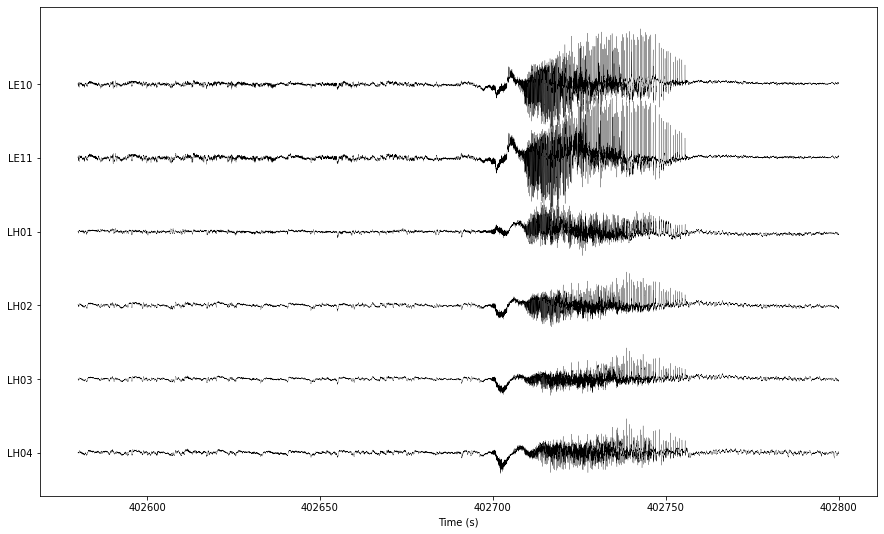

In [7]:
plot_iEEG_data(data,t_sec)

Text(0.5, 0, 'Clip Time (sec)')

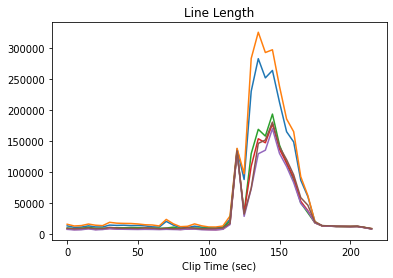

In [9]:
win_size_sec = 5

win_size_ind = int(win_size_sec * fs)

start_range = np.arange(0, len(data), win_size_ind, dtype=int)

ll_arr = np.zeros((len(start_range),data.shape[1]))
for i, start_ind in enumerate(start_range):
    ll_arr[i] = line_length(data[start_ind:(start_ind + win_size_ind)])

fig, ax = plt.subplots()
ax.plot(start_range/fs, ll_arr)
ax.set_title("Line Length")
ax.set_xlabel("Clip Time (sec)")

In [11]:
metadata = pd.read_csv('ieeg_metadata.csv')
metadata.describe()

,Unnamed: 0,Seizure number,Seizure EEC,Seizure UEO,Seizure end,Seizure duration
count,256.000000,256.000000,2.560000e+02,2.560000e+02,2.560000e+02,256.000000
mean,161.523438,3.808594,3.850046e+05,3.850087e+05,3.850987e+05,89.983726
std,105.468253,4.411047,2.512188e+05,2.512184e+05,2.512276e+05,107.030035
min,0.000000,0.000000,1.422600e+04,1.422600e+04,1.425995e+04,4.900000
25%,64.750000,1.000000,2.076900e+05,2.076916e+05,2.077277e+05,34.252500
50%,155.500000,2.000000,3.487700e+05,3.487708e+05,3.490025e+05,67.945000
75%,255.250000,5.000000,5.301436e+05,5.301436e+05,5.302733e+05,91.760000
max,364.000000,22.000000,1.694568e+06,1.694570e+06,1.694644e+06,781.950000


In [20]:
seizure_data,seizure_time = csv_utils.seizure_clip_read(metadata, username, password)
csv_utils.dump_pickle(seizure_data,'data/seizure/seizure_clips_data')
csv_utils.dump_pickle(seizure_time,'data/seizure_time/seizure_time_data')

100%|██████████| 256/256 [31:04<00:00,  7.28s/it]


In [65]:
nonseizure_data, nonseizure_time = csv_utils.nonseizure_clip_read(metadata, username, password)
csv_utils.dump_pickle(nonseizure_data,'data/non_seizure/nonseizure_clips_data')
csv_utils.dump_pickle(nonseizure_time,'data/non_seizure_time/nonseizure_time_data')

100%|██████████| 256/256 [22:17<00:00,  5.22s/it]


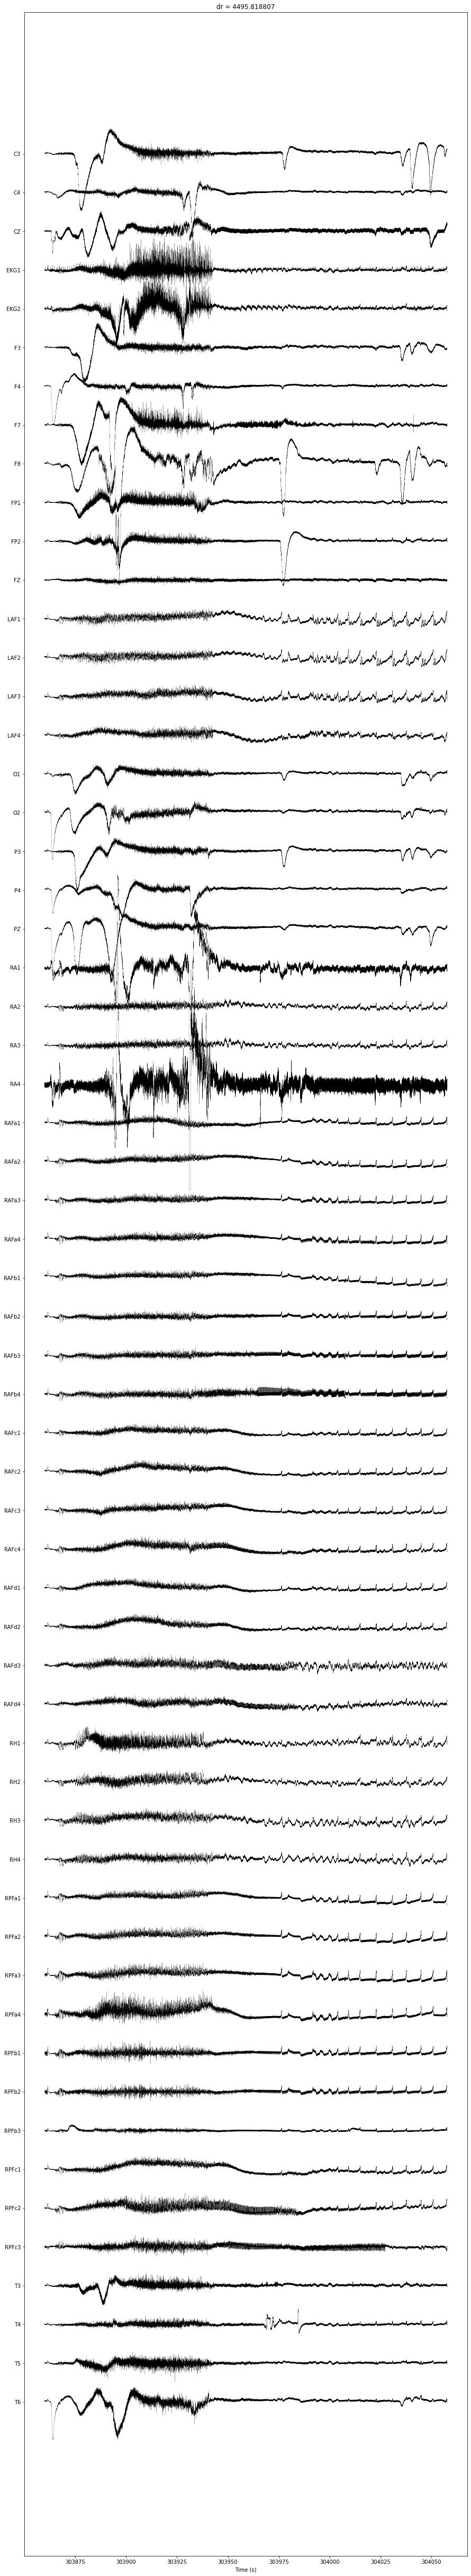

In [80]:
plot_iEEG_data(seizure_data[0],seizure_time[0])